In [1]:
%matplotlib inline
#import all the required packages
import matplotlib
from matplotlib import rcParams
import PyDSTool as dst
import numpy as np
from matplotlib import rc
from matplotlib import pyplot as plt

#Setup nice plots
def set_style():
    plt.style.use(['seaborn-colorblind','seaborn-whitegrid','seaborn-talk'])

set_style()
rc('font', **{'family': 'serif', 'serif': ['Times'], 'size': 12})
rc('text', usetex=True)
rcParams.update({'figure.figsize': (4,3)}) #SET DEFAULT FIGURE SIZE HERE--this is only important for jupyter notebook
rcParams.update({'figure.autolayout': True})

# Solve system and plot

/Users/cole/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


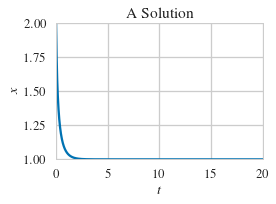

In [2]:
#Define the arguments of the ODE system
DSargs = dst.args(name='ode')
DSargs.pars = {'r':1} #Parameters
DSargs.varspecs = {'x': 'r*x-x^3'} #rhs
DSargs.ics = {'x':2} #ics
DSargs.tdomain = [0,20] #time domain for integration

#Generate the ode system, called ode, using the previously specified args, solve for the traj, and get the solution points at dt=0.01
ode = dst.Generator.Vode_ODEsystem(DSargs)
traj = ode.compute('my_sol')
pts = traj.sample(dt=0.01)

#plot the solution in a figure called p1
p1=plt.figure(figsize=(4, 3))
plt.plot(pts['t'],pts['x']) #ACTUAL PLOT
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.autoscale(enable=True, axis='x', tight=True)#for tight limits on x axis
plt.autoscale(enable=True, axis='y', tight=True)#for tight limits on y axis
#alternately set plt.xlim(a,b) as necessary
plt.title('A Solution')
p1.savefig('xvst.eps')
plt.show()

# Continuation

BP Point found 
0 : 
x  =  -3.7712692191e-18
r  =  1.00089162575e-12

Eigenvalues = 

     (0.000000,0.000000)
     (0.999991,0.000000)


branch angle = 0.99993880713597527
Test function #1: -7.989978271003756e-18



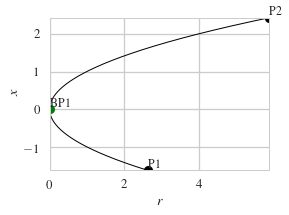

In [3]:
PC = dst.ContClass(ode)

PCargs = dst.args(name='EQ1',type='EP-C')
PCargs.freepars = ['r']
PCargs.MaxNumPoints = 500
PCargs.MaxStepSize = 1e-2 #0.01
PCargs.StepSize = 1e-3 #0.001
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.verbosity = 2
PCargs.FuncTol = 1e-8
PCargs.TestTol = 1e-8
PCargs.VarTol = 1e-8

PC.newCurve(PCargs)
PC['EQ1'].forward()
PC['EQ1'].backward()

p2 = plt.figure(figsize=(4,3))
PC.display(['r','x'],stability=True)
# PC['EQ1'].plot.toggleLabels('off',bytype='P')
# PC['EQ1'].plot.toggleLabels('off',bytype='LP')
# PC['EQ1'].plot.togglePoints('off',bytype='P')
plt.title('')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.autoscale(enable=True, axis='x', tight=True)#for tight limits on x axis
plt.autoscale(enable=True, axis='y', tight=True)#for tight limits on y axis
p2.savefig('xvsr.tif',dpi=300) #eg save as tif with 300 dpi
plt.show()

# Switch branches (start at Branch Point)

BP Point found 
0 : 
x  =  8.82136196137e-26
r  =  1e-12

Eigenvalues = 

     (0.000000,0.000000)
     (-0.999752,0.000000)


branch angle = -0.0021037843490523712
Test function #1: -3.9589299215206568e-24



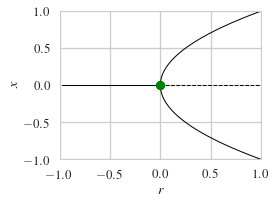

In [4]:
### CONTINUATION ON SECOND BRANCH
PCargs = dst.args(name='branch2', type='EP-C',force=True)
PCargs.initpoint = 'EQ1:BP1'
PCargs.freepars = ['r']
PCargs.MaxStepSize = 1e-2
PCargs.LocBifPoints = 'all'
PCargs.MaxNumPoints = 100
PCargs.SaveEigen = True
PCargs.verbosity = 2

p3 = plt.figure(figsize=(4,3))
PC.newCurve(PCargs)
PC['branch2'].forward()
PC['branch2'].backward()
PC.display(['r','x'],stability=True,figure=p3)
PC['EQ1'].plot.toggleLabels('off')
PC['branch2'].plot.toggleLabels('off')
# PC['branch2'].plot.toggleLabels('off',bytype='LP')
PC['EQ1'].plot.togglePoints('off',bytype='P')
PC['branch2'].plot.togglePoints('off',bytype='P')
plt.title('')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
# plt.autoscale(enable=True, axis='x', tight=True)#for tight limits on x axis
# plt.autoscale(enable=True, axis='y', tight=True)#for tight limits on y axis
plt.xlim(-1,1)
plt.ylim(-1,1)
p3.savefig('xvsr_extra_branch.tif',dpi=300)
p3.savefig('xvsr_extra_branch.eps')
plt.show()